In [1]:
print("24BAD069 - MIDHUN P - ML Experiment 3 - Scenario 1")

24BAD069 - MIDHUN P - ML Experiment 3 - Scenario 1


   gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
Done
Encoded parental education levels:
0    1
1    4
2    3
Name: parent_edu_level, dtype: int64
Encoded test preparation course:
0    1
1    0
2    1
Name: test_prep, dtype: int64
0     3
1     6
2     6
3     3
4    10
5    10
6     4
7    10
8     3
9     3
Name: study_hours, dtype: int32

0    84.037076
1    83.137921
2    59.285706
3    89.309909
4    87.437422
5    59.010664
6    95.726391
7    60.230167
8    66.774902
9    74.870772
Name: atte

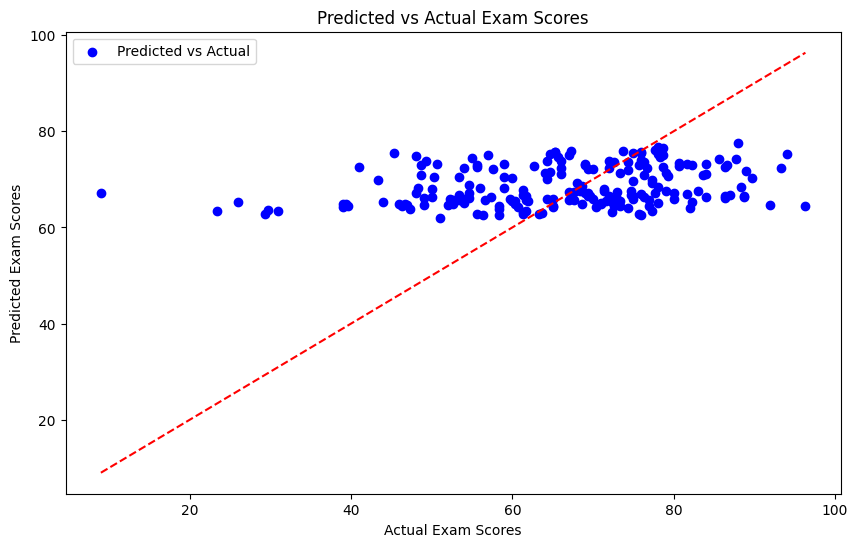

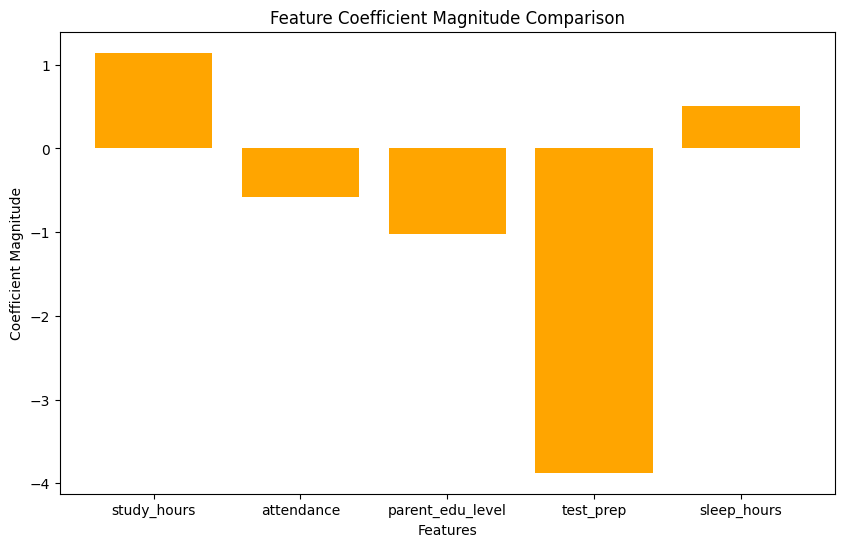

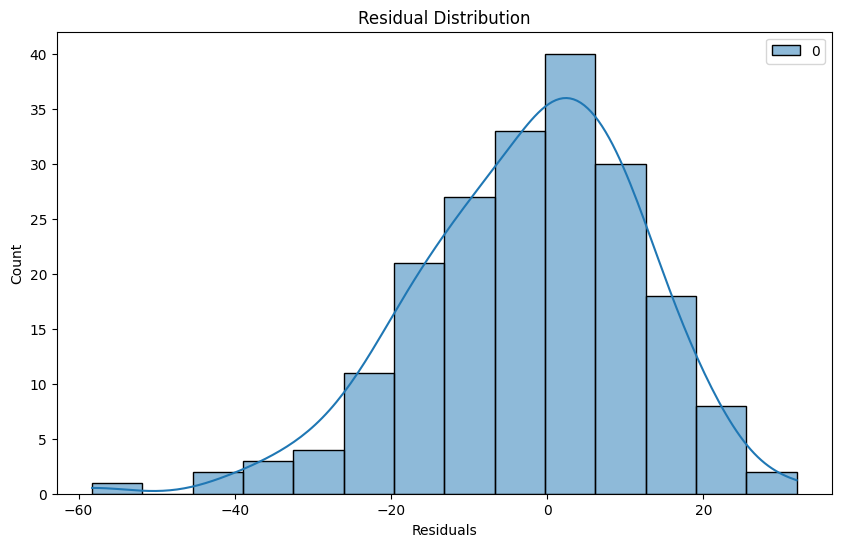


Done


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from the CSV file
df = pd.read_csv("StudentsPerformance.csv")

# Display the first few records to verify data loading
print(df.head(3))

# Define the target variable 'final_score' by averaging scores from three subjects
df["final_score"] = (df["math score"] + df["reading score"] + df["writing score"]) / 3

print("Done")
   
# Convert categorical variables into numerical format using Label Encoding
encoder = LabelEncoder()
df['parent_edu_level'] = encoder.fit_transform(df["parental level of education"])
df['test_prep'] = encoder.fit_transform(df['test preparation course'])

# Verify the encoding process by printing sample values
print("Encoded parental education levels:")
print(df['parent_edu_level'].head(3))

print("Encoded test preparation course:")
print(df['test_prep'].head(3))

# Generate synthetic data for study hours, attendance, and sleep hours
n = len(df)
df['study_hours'] = np.random.randint(1, 11, size=n)
df['attendance'] = np.random.uniform(50, 100, size=n)
df['sleep_hours'] = np.random.uniform(4, 10, size=n)

# Display the first few values of the synthetic features
print(df['study_hours'].head(10))
print()
print(df['attendance'].head(10))
print()
print(df['sleep_hours'].head(10))
print()

# Select features and target variable for the model
features = ['study_hours', 'attendance', 'parent_edu_level', 'test_prep', 'sleep_hours']
X = df[features]
y = df["final_score"]  

from sklearn.impute import SimpleImputer

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))


from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("Done")

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Predict outcomes on the test set
y_pred = model.predict(X_test)

print("Done")

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate model performance using MSE, RMSE, and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Display the regression coefficients for feature importance analysis
coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=['Coefficient'])
print("Regression Coefficients:")
print(coefficients)

from sklearn.feature_selection import RFE

# Perform Recursive Feature Elimination (RFE) to select top 3 features
rfe = RFE(model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
print(f"Selected Features by RFE: {X.columns[rfe.support_]}")

from sklearn.linear_model import Ridge, Lasso

# Apply Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse}")

# Apply Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse}")

print()
print("Done")


# Plot Actual vs. Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Predicted vs Actual Exam Scores')
plt.legend()
plt.show()

# Visualize feature coefficients using a bar chart
plt.figure(figsize=(10,6))
plt.bar(features, model.coef_.flatten(), color='orange')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Coefficient Magnitude Comparison')
plt.show()

# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.show()


print()
print("Done")


# Scenario 2



24BAD069 - MIDHUN P - scenairo 2- exp -3


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Done
Degree 2 Polynomial Regression:
Mean Squared Error (MSE): 13.760855128148345
Root Mean Squared Error (RMSE): 3.709562659957147
R² Score: 0.7440623896917427
--------------------------------------------------
Degree 3 Polynomial Regression:
Mean Squared Error (MSE): 13.813374

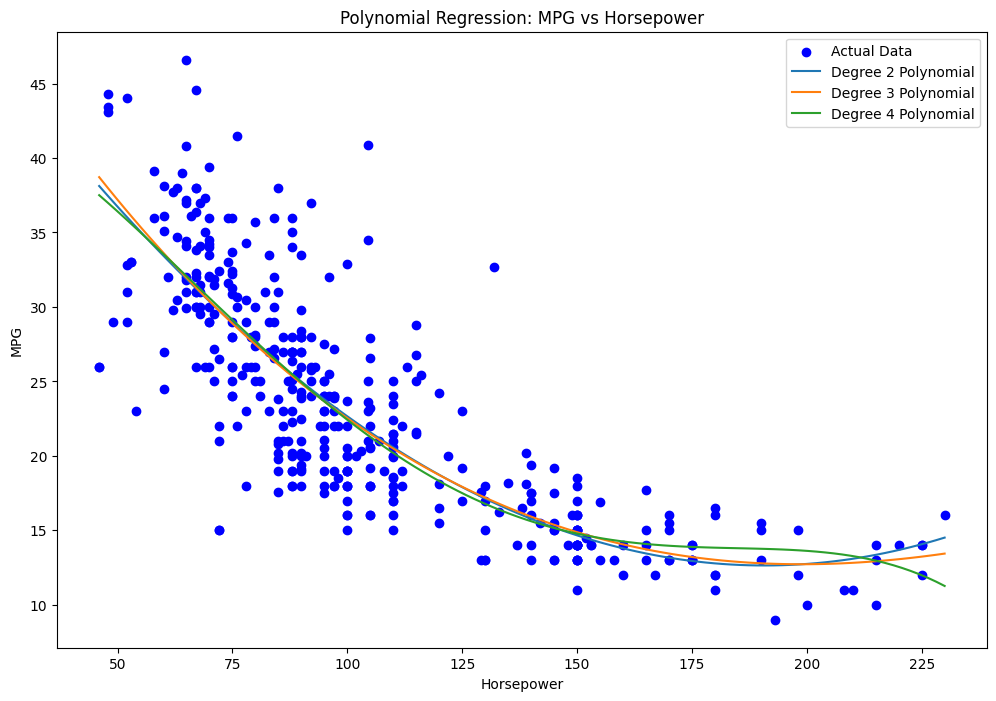

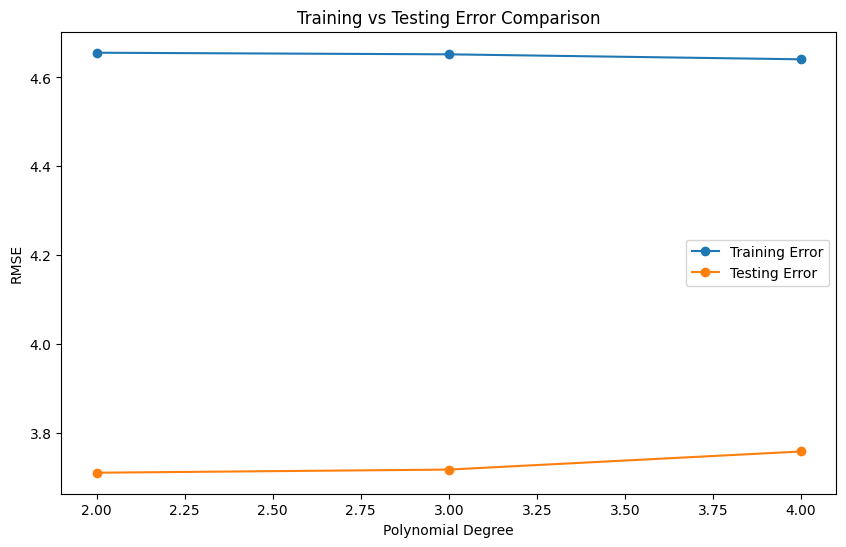

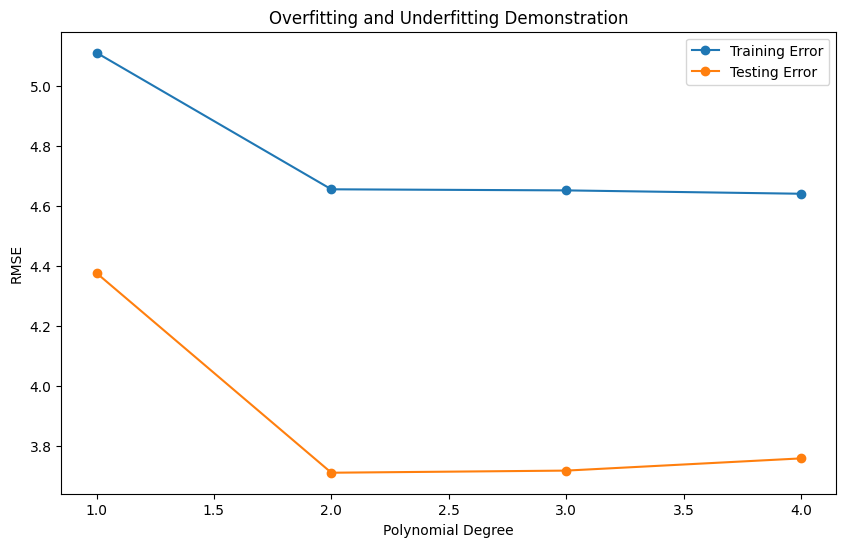

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Import required Python libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Step 2: Load and clean the Auto MPG dataset
df = pd.read_csv("auto-mpg.csv")

print(df.head())

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')


imputer = SimpleImputer(strategy='mean')
df['horsepower'] = imputer.fit_transform(df[['horsepower']])
df['mpg'] = imputer.fit_transform(df[['mpg']])

X = df[['horsepower']].values  
y = df['mpg'].values  
print("Done")
  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

degrees = [2, 3, 4]
models = {}
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models[degree] = model
    
    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Degree {degree} Polynomial Regression:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2}")
    print('-' * 50)

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    ridge_model = Ridge(alpha=1)
    ridge_model.fit(X_train_poly, y_train)

    y_pred_ridge = ridge_model.predict(X_test_poly)
    
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    print(f"Ridge Regression (Degree {degree}):")
    print(f"Mean Squared Error (MSE): {mse_ridge}")
    print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
    print(f"R² Score: {r2_ridge}")
    print('-' * 50)


plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Actual Data')
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_range_poly = poly.fit_transform(x_range_scaled)
    y_range_pred = models[degree].predict(X_range_poly)
    
    plt.plot(x_range, y_range_pred, label=f'Degree {degree} Polynomial')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression: MPG vs Horsepower')
plt.legend()
plt.show()

train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = models[degree]
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    train_errors.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_errors.append(np.sqrt(mean_squared_error(y_test, test_pred)))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Training vs Testing Error Comparison')
plt.legend()
plt.show()

train_errors_all = []
test_errors_all = []

for degree in range(1, 5):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)

    train_errors_all.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_errors_all.append(np.sqrt(mean_squared_error(y_test, test_pred)))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), train_errors_all, label='Training Error', marker='o')
plt.plot(range(1, 5), test_errors_all, label='Testing Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Overfitting and Underfitting Demonstration')
plt.legend()
plt.show()